# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Importamos los módulos necesarios para trabajar
import requests
import matplotlib.pyplot as plt

In [2]:
# Nuestro producto de interés será Protector Solar
buscar = "Protector Solar"

# Seguimos el formato que requiere la API donde adicionalmente indicamos que es MercadoLibre Argentina
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el 'request' y obtenemos la 'response'
response = requests.request("GET", url)
print(response) 

# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Protector Solar","paging":{"total":2940,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA901447311","title":"Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml","condition":"new","thumbnail_id":"641809-MLA44740405275_012021","catalog_product_id":"MLA16048315","listing_type_id":"gold_special","permalink":"https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA392400","domain_id":"MLA-SUNSCREENS","thumbnail":"http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg","currency_id":"ARS","order_backend":1,"price":7409,"original_price":8019,"sale_price":null,"sold_quantity":500,"available_quantity":500,"official_store_id":1859,"official_store_name":"Farmacias Selma","use_thumbnail_id":true,"accepts_mercadopago":true,"tags":["loyalty_discount_eligible","deal_of_the_day","good_qu

In [3]:
# Guardamos el resultado en un diccionario, utilizamos Json debido a que es muy amigable para hacer estas tareas
# y le brinda una estructura util
data = response.json()

# obtenemos un diccionario denominado 'data'
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'Protector Solar',
 'paging': {'total': 2940, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA901447311',
   'title': 'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml',
   'condition': 'new',
   'thumbnail_id': '641809-MLA44740405275_012021',
   'catalog_product_id': 'MLA16048315',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.ar/protector-solar-dermaglos-fps-50-fps-50-en-emulsion-de-250-ml/p/MLA16048315',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA392400',
   'domain_id': 'MLA-SUNSCREENS',
   'thumbnail': 'http://http2.mlstatic.com/D_641809-MLA44740405275_012021-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 7409,
   'original_price': 8019,
   'sale_price': None,
   'sold_quantity': 500,
   'available_quantity': 500,
   'official_store_id': 1859,
   'official_store_name': 'Farmacias 

In [4]:
# Para chequear haber hecho bien la busqueda inspeccionamos dentro del primer elemento
# del diccionario, en la variable 'results' y pedimos que nos brinde el título
data['results'][0]['title']

# Con el resultado vemos que hicimos bien la búsqueda

'Protector Solar Dermaglós Fps 50 Fps 50 En Emulsión De 250 Ml'

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [5]:
# Importamos el módulo que requeriremos para hacer el dataframe y el histograma
import pandas as pd 

In [6]:
# Creamos un dataframe que contiene dos columnas, una con el título de los productos y otra con los precios
precios_df = pd.DataFrame(columns=['Title', 'Price'])

# Armamos un loop que permitirá ir llenando el dataframe generado previamente con los productos obtenidos
for result in data['results']:
    precios_df = precios_df.append({'Title': result['title'], 'Price': result['price']}, ignore_index=True)
    
# Observamos los resultados. Guardamos el nombre del producto para poder verificar que efectivamente sea un protector solar.
print(precios_df)

                                                Title     Price
0   Protector Solar Dermaglós Fps 50 Fps 50 En Emu...      7409
1   Protector Solar Eucerin Oil Control Fps 50 Toq...     15553
2   Dermaglos Facial Fps50 Efecto Seco Invisible X...      8846
3   Isdin Protector Solar Age Repair Fusion Water ...     19649
4   Umbrella Intelligent Protector Solar Spf 99 50grs  13490.18
5   Isdin Fotoprotector Spf50+ Fusion Water Toque ...  13570.56
6   Anthelios Uvmune 400 Fluido Invisible50+ La Ro...     12232
7   Fotoprotector Isdin Spf 50+ Gel Crema Protecto...     20487
8   Fotoprotector Isdin Pediatrics Fps 50+ Fusion ...  17486.61
9   Protector Solar Dermaglós Fps 30 Fps 30 En Emu...      9884
10  Vansame Solar Crema Fps 50+ Pieles Extremadame...     15900
11  Protector Solar Dermaglós Fps50 Spray Continuo...      8651
12  Protector Solar Facial Eucerin Sun Fps 50+ Ton...     11542
13  Protector Solar Color Efecto Mate Anthelios Fp...     11017
14  Fotoprotector Isdin Fusion Water Col

C:\Users\mateo\AppData\Local\Temp\ipykernel_16568\3004186628.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': result['title'], 'Price': result['price']}, ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_16568\3004186628.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': result['title'], 'Price': result['price']}, ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_16568\3004186628.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  precios_df = precios_df.append({'Title': result['title'], 'Price': result['price']}, ignore_index=True)
C:\Users\mateo\AppData\Local\Temp\ipykernel_16568\3004186628.py:6: FutureWarning: 

In [7]:
# Calculamos el precio máximo, mínimo y promedio
precio_maximo = precios_df['Price'].max()
precio_minimo = precios_df['Price'].min()
precio_promedio = precios_df['Price'].mean()

# Observamos los resultados
print(f"Precio máximo: {precio_maximo}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio promedio: {precio_promedio}")

Precio máximo: 27957
Precio mínimo: 2732
Precio promedio: 11615.472


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

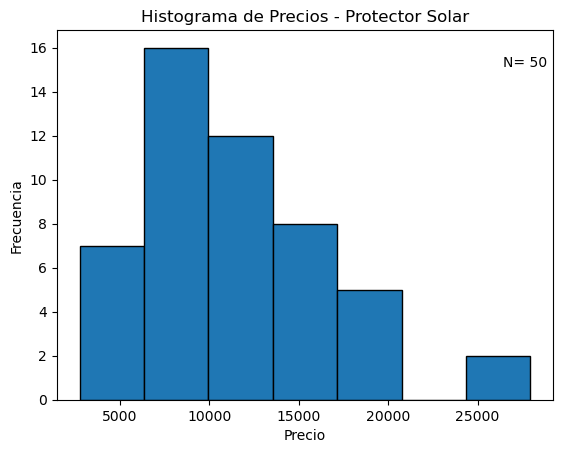

In [8]:
# Armamos un histograma de los precios
plt.hist(precios_df['Price'],bins='auto', edgecolor='k') 
# Matplotlib utiliza el número de bins óptimo según la regla de Freedman-Diaconis. 

# Brindamos referencias para los ejes
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios - Protector Solar')
sample_size = len(precios_df)
plt.text(0.9, 0.9, f'N= {sample_size}',transform=plt.gca().transAxes,
         fontsize=10) 
# Mencionamos el número de observaciones. Los dos primeros parámetros determinan la ubicación 
# del texto en términos de coordenadas.
# EL valor de transform nos dice que las coordenadas son relativas al tamaño de los ejes. 
# El tercer parámetro indica el texto y el último, el tamaño de letra.

# Ejecutamos el gráfico para que nos lo muestre
plt.show()

In [15]:
#  Usamos la regla del IQR para identificar outliers
Q1 = precios_df['Price'].quantile(0.25)
Q3 = precios_df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = precios_df[(precios_df['Price'] < lower_bound) | (precios_df['Price'] > upper_bound)]
n_outliers=len(outliers)
print(n_outliers) # Nos indica que hay un outlier.
print(outliers['Price'].tolist()) # buscamos el precio del bien que es un outlier

# Notar que si se modifica la página o los precios, puede variar el resultado de los outliers    


1
[27957]


In [17]:
# vamos a examinar el outlier, a partir de su precio obtendremos su nombre del data frame original

bien_outlier = precios_df[precios_df['Price'] == 27957]['Title'].iloc[0]
print(bien_outlier)

Isdin Eryfotona Spf99 Fluid Protector Solar Piel Sensible
